# Locations

Locations are where model results exist in the [Network](network.qmd).
The main location types are
[nodes](../api/result_network.ResultNodes.html#mikeio1d.result_network.ResultNodes),
[reaches](../api/result_network.ResultReaches.html#mikeio1d.result_network.ResultReaches),
and
[catchments](../api/result_network.ResultCatchments.html#mikeio1d.result_network.ResultCatchments)

``` python
from mikeio1d import Res1D
res = Res1D('../data/network.res1d')
res_catchments = Res1D('../data/catchments.res1d')
```

## Data structures

There are two main data structures for locations: location collections
([`ResultLocations`](../api/result_network.ResultLocations.html#mikeio1d.result_network.ResultLocations))
and single locations
([`ResultLocation`](../api/result_network.ResultLocation.html#mikeio1d.result_network.ResultLocation)).

### Location collections

Access location collections from a [Res1D](res1d.qmd) object. Each
collection shows available quantities and location IDs.

In [2]:
res.nodes

<ResultNodes> (119)
 
 Quantities (1) Water level (m) Derived Quantities (3) NodeFlooding NodeWaterDepth NodeWaterLevelAboveCritical

In [3]:
res.reaches

<ResultReaches> (118)
 
 Quantities (2) Water level (m) Discharge (m^3/s) Derived Quantities (6) ReachAbsoluteDischarge ReachFilling ReachFlooding ReachQQManning ReachWaterDepth ReachWaterLevelAboveCritical

In [4]:
res_catchments.catchments

<ResultCatchments> (31)
 
 Quantities (5) Total Runoff (m^3/s) Actual Rainfall (m/s) Zink, Load, RR (kg/s) Zink, Mass, Accumulated, RR (kg) Zink, RR (mg/l) Derived Quantities (0)

> **Note**
>
> Gridpoints only exist as single locations on a reach, and have no
> collection.

### Single locations

Access a single location by indexing its respective collection with its
unique ID. Each location shows available quantities and static
properties.

In [5]:
res.nodes['1']

<Manhole: 1>
 
 Attributes (8) id: 1 type: Manhole xcoord: -687934.6000976562 ycoord: -1056500.69921875 ground_level: 197.07000732421875 bottom_level: 195.0500030517578 critical_level: inf diameter: 1.0 Quantities (1) Water level (m) Derived Quantities (3) NodeFlooding NodeWaterDepth NodeWaterLevelAboveCritical

In [6]:
res.reaches['100l1']

<Reach: 100l1>
 
 Attributes (9) name: 100l1 length: 47.6827148432828 start_chainage: 0.0 end_chainage: 47.6827148432828 n_gridpoints: 3 start_node: 100 end_node: 99 height: 0.30000001192092896 full_flow_discharge: 0.12058743359507902 Quantities (2) Water level (m) Discharge (m^3/s) Derived Quantities (6) ReachAbsoluteDischarge ReachFilling ReachFlooding ReachQQManning ReachWaterDepth ReachWaterLevelAboveCritical

In [7]:
# gridpoint on reach 100l1 at chainage 23.841
res.reaches['100l1']['23.841']

<ResultGridPoint>
 
 Attributes (5) reach_name: 100l1 chainage: 23.8413574216414 xcoord: -687897.8000488281 ycoord: -1056390.4503479004 bottom_level: 195.0500030517578 Quantities (1) Discharge (m^3/s) Derived Quantities (0)

> **Tip**
>
> Gridpoints can also be indexed by number instead of chainage. For
> example:
>
> ``` python
> res.reaches['100l1'][0]  # first gridpoint
> res.reaches['100l1'][-1] # last gridpoint
> ```

In [9]:
res_catchments.catchments['100_16_16']

<Catchment: 100_16_16>
 
 Attributes (3) id: 100_16_16 area: 22800.0 type: Kinematic Wave Quantities (5) Total Runoff (m^3/s) Actual Rainfall (m/s) Zink, Load, RR (kg/s) Zink, Mass, Accumulated, RR (kg) Zink, RR (mg/l) Derived Quantities (0)

## Quantities

[Quantities](quantities.qmd) are the actual model results. Each single
location or location collection has associated quantities.

In [10]:
res.nodes.WaterLevel

<QuantityCollection (119): Water level (m)>

In [11]:
res.nodes['1'].WaterLevel

<Quantity: Water level (m)>

> **Can’t find a which location a quantity belongs to?**
>
> The [Network](network.qmd) structure is generic and applies across
> different domains (e.g. collection systems, water distribution,
> rivers). Sometimes this can be challenging to find a particular
> result. Here are some examples of result types mapped onto this
> structure.
>
> | Location   | Example quantities                                  |
> |------------|-----------------------------------------------------|
> | Nodes      | Water level (e.g. manhole, basin, outlet, junction) |
> |            | Pump discharge in structure                         |
> | Reaches    | Discharge (e.g. pipes, pumps, weirs)                |
> |            | Water level (e.g. at specific chainges)             |
> | Catchments | Catchment discharge                                 |
> |            | Total runoff                                        |
> | Global     | Water balance                                       |
> |            | User defined variable types                         |

Refer to the [Quantities](quantities.qmd) page for more information on
how to read and plot the returned quantities.

## Static attributes

Each location has a set of static attributes.

In [12]:
res.nodes['1'].ground_level

197.07000732421875

## Reading data

All result data for a single location or location collection can be read
into a pandas DataFrame.

In [13]:
df = res.reaches['100l1'].read()
df.head()

In [14]:
df = res.reaches.read()
df.head()

5 rows × 376 columns

## GeoDataFrames

Locations collections can be extracted into a GeoDataFrame, both with
and without quantities.

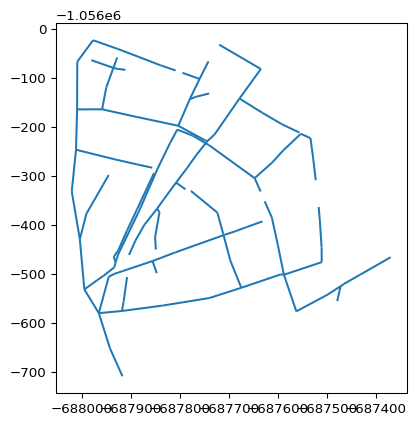

In [15]:
gdf = res.reaches.to_geopandas()
gdf.plot()

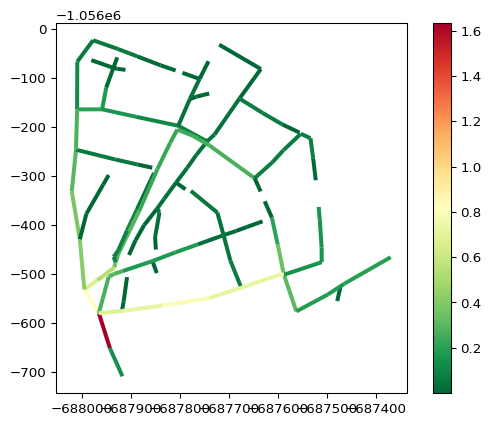

In [16]:
gdf = res.reaches.to_geopandas(agg='max')
gdf.plot(column='max_Discharge', linewidth=3, cmap='RdYlGn_r', legend=True)

## Examples

-   [Res1D Basics](../examples/res1d_basic.qmd)
-   [Res1D Export to
    shapefile](../examples/res1d_export_to_shapefile.qmd)

> **Tip**
>
> There are also several notebook examples available on our [GitHub
> repository]()https://github.com/DHI/mikeio1d/tree/main/notebooks.